In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Necessary Libary

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import Datset

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Developer/Loan Prediction.csv')
df.drop(columns=['Id'], inplace=True)


In [ ]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


# Label Encoding binary categorical columns

In [ ]:
# Label Encoding binary categorical columns
from sklearn.preprocessing import LabelEncoder
label_cols = ['Married/Single', 'House_Ownership', 'Car_Ownership']
label_encoder = LabelEncoder()
for col in label_cols:
    df[col] = label_encoder.fit_transform(df[col])


# One-Hot Encoding multi-class categorical columns

In [ ]:
# One-Hot Encoding multi-class categorical columns
multi_class_cols = ['Profession', 'CITY', 'STATE']
df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)


In [ ]:
# Convert boolean columns to int if any
df[df.select_dtypes('bool').columns] = df.select_dtypes('bool').astype(int)


In [ ]:
# Split into features and target
X = df.drop(columns=['Risk_Flag'])
y = df['Risk_Flag']

Balance the dataset

In [ ]:
# Balance the dataset using SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Original class distribution:", Counter(y))
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("New class distribution after SMOTE:", Counter(y_resampled))


Original class distribution: Counter({0: 221004, 1: 30996})
New class distribution after SMOTE: Counter({0: 221004, 1: 221004})


Split train/test

In [ ]:
# Split the balanced data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42)


Scaling/ normalization

In [ ]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Normalize the features
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
X_train_normalized = normalizer.fit_transform(X_train_scaled)
X_test_normalized = normalizer.transform(X_test_scaled)

In [ ]:
# Convert back to DataFrame
X_train_normalized = pd.DataFrame(X_train_normalized, columns=X.columns)
X_test_normalized = pd.DataFrame(X_test_normalized, columns=X.columns)


Train the Random Forest

In [ ]:
# Train a Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normalized, y_train)

RandomForestClassifier(random_state=42)

# Predict on test data

In [ ]:
# Predict on test data
y_pred = rf_model.predict(X_test_normalized)

#Evaluate the model

In [ ]:
#Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9413474808262257

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94     44323
           1       0.92      0.97      0.94     44079

    accuracy                           0.94     88402
   macro avg       0.94      0.94      0.94     88402
weighted avg       0.94      0.94      0.94     88402



# Confusion Matrix

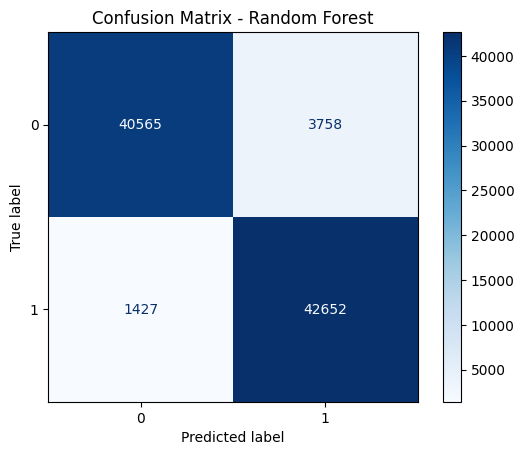

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.show()